In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from numpy import linalg as LA
import math
import scipy.stats as stats
count = 0
from scipy.stats import norm

In [2]:
images=[]
path = "C:/Users/Arun/Desktop/ENPM 673/Proj3-GMM/Data/Red/"
for image in os.listdir(path):
    images.append(image)

In [3]:
im=cv2.imread("%s%s"%(path,images[0]))

In [4]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(im,kernel,iterations = 2)
kernel2 = np.ones((3,3),np.uint8)
dilation = cv2.dilate(im,kernel2,iterations = 3)


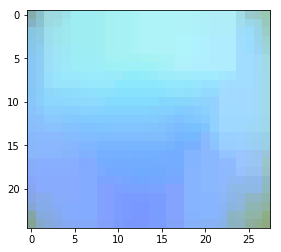

In [5]:
plt.imshow(dilation)

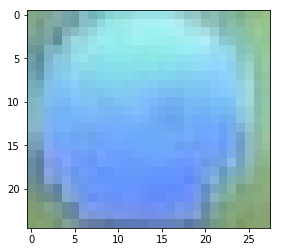

In [6]:
plt.imshow(im)

In [7]:
print("%s%s"%(path,image))

C:/Users/Arun/Desktop/ENPM 673/Proj3-GMM/Data/Red/9.jpg


In [8]:
hitogram_b=np.zeros((256,1))
hitogram_g=np.zeros((256,1))
hitogram_r=np.zeros((256,1))

In [9]:
#without dilation
for image in images:
    img = cv2.imread("%s%s"%(path,image))
    
    color = ("b", "g", "r") 
    for i,col in enumerate(color):
        if col =='b':
            histr_b = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_b=np.column_stack((hitogram_b,histr_b))

        if col =='g':
            histr_g = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_g=np.column_stack((hitogram_g,histr_g))

        if col =='r':
            histr_r = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_r=np.column_stack((hitogram_r,histr_r))

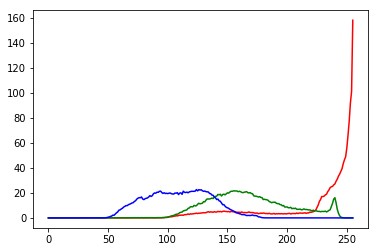

In [10]:
histogram_avg_r = np.sum(hitogram_r, axis=1) / (hitogram_r.shape[1]-1)
histogram_avg_g = np.sum(hitogram_g, axis=1) / (hitogram_g.shape[1]-1)
histogram_avg_b = np.sum(hitogram_b, axis=1) / (hitogram_b.shape[1]-1)

plt.plot(histogram_avg_r,color = 'r')
plt.plot(histogram_avg_g,color = 'g')
plt.plot(histogram_avg_b,color = 'b')
plt.show()


In [11]:
#With dilation
for image in images:
    img = cv2.imread("%s%s"%(path,image))
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(im,kernel,iterations = 2)
    kernel2 = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(im,kernel2,iterations = 3)
    
    color = ("b", "g", "r") 
    for i,col in enumerate(color):
        if col =='b':
            histr_b = cv2.calcHist([dilation],[i],None,[256],[0,256])
            hitogram_b=np.column_stack((hitogram_b,histr_b))

        if col =='g':
            histr_g = cv2.calcHist([dilation],[i],None,[256],[0,256])
            hitogram_g=np.column_stack((hitogram_g,histr_g))

        if col =='r':
            histr_r = cv2.calcHist([dilation],[i],None,[256],[0,256])
            hitogram_r=np.column_stack((hitogram_r,histr_r))

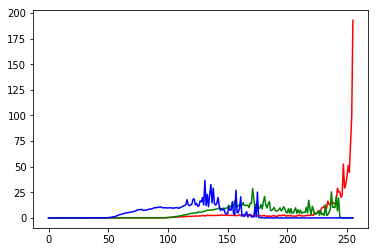

In [12]:
histogram_avg_r = np.sum(hitogram_r, axis=1) / (hitogram_r.shape[1]-1)
histogram_avg_g = np.sum(hitogram_g, axis=1) / (hitogram_g.shape[1]-1)
histogram_avg_b = np.sum(hitogram_b, axis=1) / (hitogram_b.shape[1]-1)

plt.plot(histogram_avg_r,color = 'r')
plt.plot(histogram_avg_g,color = 'g')
plt.plot(histogram_avg_b,color = 'b')
plt.show()

In [13]:
def gaussian(x, mu, sig):
    return ((1/(sig*math.sqrt(2*math.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))

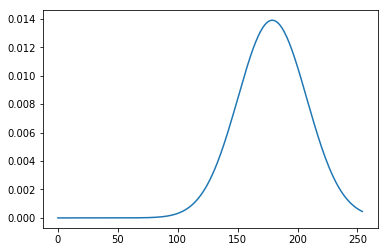

In [14]:
x=np.array((range(0,256))).T
(mean, stds) = cv2.meanStdDev(img)

y= np.array
x=list(range(0, 255))

b_mean = mean[0]
b_std = stds[0]

g_mean = mean[1]
g_std = stds[1]

r_mean = mean[2]
r_std = stds[2]


ans_b=gaussian(x, b_mean, b_std)
ans_g=gaussian(x, g_mean, g_std)
ans_r=gaussian(x, r_mean, r_std)



plt.plot(ans_g)
plt.show()

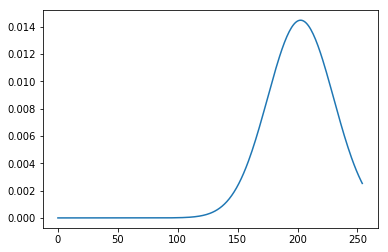

In [15]:
#with dilation
x=np.array((range(0,256))).T
(mean, stds) = cv2.meanStdDev(dilation)

y= np.array
x=list(range(0, 255))

b_mean = mean[0]
b_std = stds[0]

g_mean = mean[1]
g_std = stds[1]

r_mean = mean[2]
r_std = stds[2]


ans_b=gaussian(x, b_mean, b_std)
ans_g=gaussian(x, g_mean, g_std)
ans_r=gaussian(x, r_mean, r_std)



plt.plot(ans_g)
plt.show()

In [16]:
pixel = []
g1, g2, g3, g4 = [], [], [], []
y = []

In [17]:
ig = cv2.imread("%s%s"%(path,images[0]))
ig=ig[:, :, 2]

In [18]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(ig,kernel,iterations = 2)
kernel2 = np.ones((3,3),np.uint8)
dilation = cv2.dilate(ig,kernel2,iterations = 3)

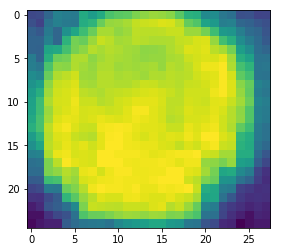

In [19]:
plt.imshow(ig)

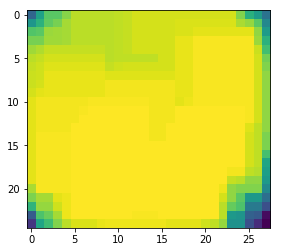

In [20]:
plt.imshow(dilation)

In [21]:
def Probabilty(x_co, mean, std):
    m=mean*np.ones((1,x_co.shape[0]))
    return (1 / (std * np.sqrt(2 * np.pi))) * (np.exp(-(np.square(x_co - m)) / (2 * (std) ** 2)))

In [22]:
#Blue
n = 0
mean1 = 120
mean2 = 150
# mean3 = 150

std1 = 10
std2 = 10
# std3 = 10
pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 0]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

In [23]:
while (n != 100):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
#         p3 = Probabilty(p, mean3, std3)
        
        D=p1+ p2 
#         D=p1+ p2 
        b1=p1/D
        b2=p2/D
#         b3=p3/D
        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
#         mean3=np.sum(b3*p)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
#         std3=np.sqrt(np.sum(b3*np.square(p-mean3))/np.sum(b3))
        n = n + 1

In [24]:
print('final mean- ',mean1,mean2)
print('final strd- ',std1, std2)

final mean-  88.59471957900057 129.06556795212748
final strd-  16.909108676216494 17.142150065394695


In [25]:
#Green

pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 1]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

n = 0
mean1 = 120
mean2 = 240


std1 = 10
std2 = 3

In [26]:
while (n != 80):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
        
        D=p1+p2
        b1=p1/D
        b2=p2/D

        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
        n = n + 1

In [27]:
print('final mean- ',mean1,mean2)
print('final strd- ',std1,std2)

final mean-  147.5747760225645 189.73819146809973
final strd-  20.590254247566072 31.163249235318204


In [28]:
#Red
n = 0
mean1 = 250
mean2 = 210


std1 = 10
std2 = 5

pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 2]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

In [29]:

while (n != 60):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
        
        D=p1+ p2 
 
        b1=p1/D
        b2=p2/D

        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
        n = n + 1

In [30]:
print('final mean- ',mean1,mean2)
print('final strd- ',std1, std2)

final mean-  248.10449537635617 187.8643530434557
final strd-  6.350613849269428 43.280536528210526


0.02354732055094594
0.057236820376122044
0.02103657745748104
0.03375068892169574
0.03080631695968449
0.07857121684024371
0.030637465786577764
0.022449813401448252
0.018940512384825445


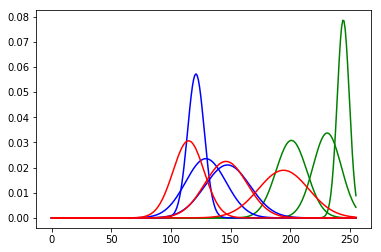

In [31]:
def gaussian(x, mu, sig):
    return ((1/(sig*math.sqrt(2*math.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))


x=list(range(0, 256))

mg1=np.array([147.57])
sg1=np.array([20.59])
mg2=np.array([189.73])
sg2=np.array([31.16])


g1=gaussian(x, mg1, sg1)
g2=gaussian(x, mg2, sg2)


plt.plot(g1, 'g')
plt.plot(g2, 'g')



mr1=np.array([246.5])
sr1=np.array([7.9])
mr2=np.array([173.63])
sr2=np.array([38.77])

r1=gaussian(x, mr1, sr1)
r2=gaussian(x, mr2, sr2)


mb1=np.array([88.5])
sb1=np.array([16.9])
mb2=np.array([129.06])
sb2=np.array([17.14])

b1=gaussian(x, mb1, sb1)
b2=gaussian(x, mb2, sb2)


plt.plot(b1, 'b')
plt.plot(b2, 'b')

plt.plot(r1, 'r')
plt.plot(r2, 'r')

print(max(b1))
print(max(b2))

print(max(g1))
print(max(g2))

print(max(r1))
print(max(r2))
plt.show()


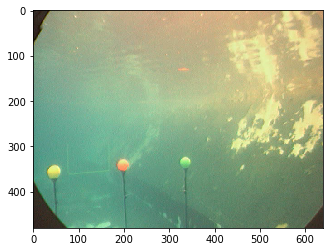

In [32]:
image=cv2.imread('frame.png')
# cv2.circle(image,(200,200),5,(0,0,255),2)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [37]:
image_b=image[:,:,0]
image_g=image[:,:,1]
image_r=image[:,:,2]
img_out3=np.zeros(image_r.shape, dtype = np.uint8)

for index, v in np.ndenumerate(image_r):
    
    if r1[v]>0.03 and (180<image_g[index]<250 )and image_b[index]<150:
                            img_out3[index]=255
    else:
                            img_out3[index]=0

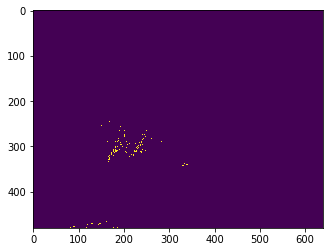

In [38]:
plt.imshow(img_out3)

In [39]:
ret, threshold3 = cv2.threshold(img_out3, 240, 255, cv2.THRESH_BINARY)
kernel3 = np.ones((2,2),np.uint8)
    
dilation3 = cv2.dilate(threshold3,kernel3,iterations =9)
contours3, _= cv2.findContours(dilation3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
for contour in contours3:
            if cv2.contourArea(contour) >  40:
                (x,y),radius = cv2.minEnclosingCircle(contour)
                print(x)
                print(y)
                print(radius)
                center = (int(x),int(y))
                radius = int(radius)
                if radius > 13 and radius < 15.5:
                    cv2.circle(image,center,radius,(0,0,255),2)

91.0
477.5
9.12424373626709
156.0
478.5
40.00322341918945
169.5
357.5
6.36406135559082
64.5
351.5
6.36406135559082
338.0
341.0
16.970661163330078
287.5
293.5
6.36406135559082
266.0
287.0
7.071167945861816
233.75
285.5
6.731555938720703
291.5
280.5
6.36406135559082
166.5
278.5
8.514793395996094
155.5
258.5
6.36406135559082
210.26321411132812
301.33306884765625
60.78962326049805
173.0
251.0
7.810349941253662
141.0
239.5
6.726912021636963


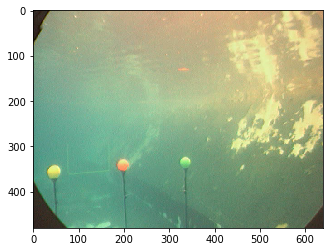

In [40]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))